In [5]:
from datetime import datetime
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
DATA_PATH = Path('../datasets/chap5_data/')

walmart_stores = pd.read_csv(DATA_PATH / '1962_2006_walmart_store_openings.csv', 
                             parse_dates=['date_super']).dropna()

walmart_store_count = walmart_stores.groupby("YEAR")[["storenum"]].agg("count").rename(columns={"storenum": "store_count"})

walmart_store_count = pd.merge(walmart_stores, walmart_store_count, on="YEAR")
walmart_store_count= walmart_store_count.set_index(pd.DatetimeIndex(walmart_store_count.date_super))
walmart_store_count = walmart_store_count[["date_super", "store_count"]]
walmart_store_count.drop_duplicates(subset="date_super", inplace=True)
walmart_store_count_series = walmart_store_count.store_count
walmart_store_count_series = walmart_store_count_series.asfreq('2D')
walmart_store_count_series = walmart_store_count_series.interpolate(method="spline", order=2)


In [2]:
# get data at frequency of 1 day
walmart_store_count_series = walmart_store_count_series.asfreq('D', method='pad')

**set up the plot and `shift_val`. `shift_val` is the value of lag we want to plot on graph**

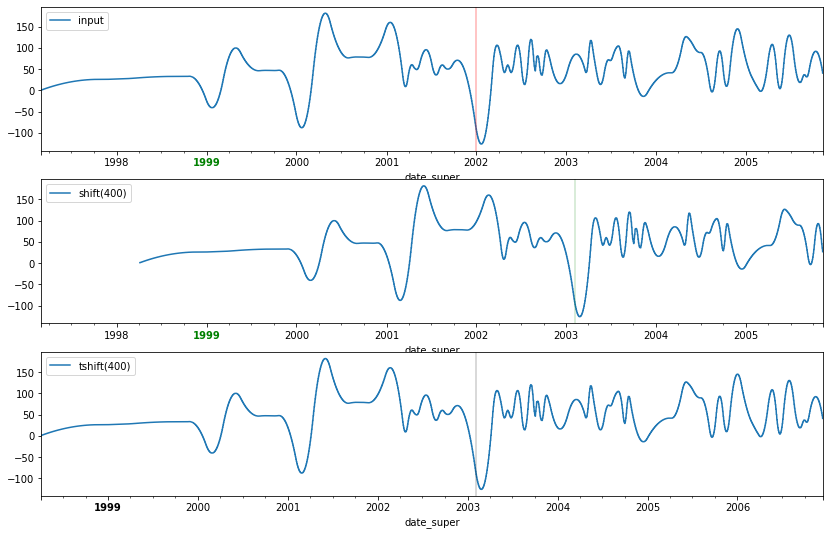

In [3]:
fig, ax = plt.subplots(3, figsize=(14,9))
shift_val = 400

#create 3 plots, one normal, one shifted with index, and other shifted with time
walmart_store_count_series.plot(ax=ax[0])
#shift the date by shift_val
walmart_store_count_series.shift(shift_val).plot(ax=ax[1])
#shift the time index using tshift
walmart_store_count_series.tshift(shift_val).plot(ax=ax[2])

#slect a date to draw line on plot
date_max = pd.to_datetime('2002-01-01')
delta = pd.Timedelta(shift_val, 'D')

#Put marker on three plot to undestand how thsift shifting the index and shift is changing the data.
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='green')
ax[0].axvline(date_max, alpha=0.3, color='red')

ax[1].legend(['shift({})'.format(shift_val)], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='green')
ax[1].axvline(date_max + delta, alpha=0.2, color='green')

ax[2].legend(['tshift({})'.format(shift_val)], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='black')
ax[2].axvline(date_max + delta, alpha=0.2, color='black');

